In [ ]:
!pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 8.4 MB/s eta 0:00:00


In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import uniform
from sklearn.tree import plot_tree
from sklearn import tree
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
#Load the cleaned dataset
airl = pd.read_csv(r"/content/Balanced_Airline_data.csv",sep=";")

In [ ]:
#check the first 10 rows in the cleaned dataset
airl.head(10)

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,2,0,2,4,2,5,0,0.0,satisfied
5,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,...,2,5,4,5,5,4,2,0,0.0,satisfied
6,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,...,5,5,0,5,5,5,3,17,15.0,satisfied
7,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,...,2,3,3,4,5,4,2,0,0.0,satisfied
8,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,...,4,4,0,1,5,4,4,0,0.0,satisfied
9,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,...,2,2,4,5,3,4,2,30,26.0,satisfied


In [ ]:
print(airl.isna().sum())

Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             483
satisfaction                           0
dtype: int64


# **DATA PREPARATION FOR MODELLING**

Step 1: Encode all the categorical features

In [ ]:
# Identify categorical features
categorical_features = airl.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_en = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for r in categorical_features:
    airl[r] = label_en.fit_transform(airl[r])

print("DataFrame after encoding categorical features:")
airl.head(10)

DataFrame after encoding categorical features:


,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,65,1,1,265,0,0,0,2,2,...,3,3,0,3,5,3,2,0,0.0,1
1,0,47,1,0,2464,0,0,0,3,0,...,3,4,4,4,2,3,2,310,305.0,1
2,0,15,1,1,2138,0,0,0,3,2,...,2,3,3,4,4,4,2,0,0.0,1
3,0,60,1,1,623,0,0,0,3,3,...,1,1,0,1,4,1,3,0,0.0,1
4,0,70,1,1,354,0,0,0,3,4,...,2,2,0,2,4,2,5,0,0.0,1
5,0,30,1,1,1894,0,0,0,3,2,...,2,5,4,5,5,4,2,0,0.0,1
6,0,66,1,1,227,0,0,0,3,2,...,5,5,0,5,5,5,3,17,15.0,1
7,0,10,1,1,1812,0,0,0,3,2,...,2,3,3,4,5,4,2,0,0.0,1
8,0,56,1,0,73,0,0,0,3,5,...,4,4,0,1,5,4,4,0,0.0,1
9,0,22,1,1,1556,0,0,0,3,2,...,2,2,4,5,3,4,2,30,26.0,1


Step 2: Define the input(x) and output(y) features in the dataset.

In [ ]:
# X is for input(numerical) features and y is for target feature(satisfaction)
a = 'satisfaction'
X = airl.drop(columns=[a])
y = airl[a]

Step 3: Split the dataset into Train & Test sets

In [ ]:
##For the dataset containing all the features
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

Step 4: Perform Feature Scaling on the train and test sets

In [ ]:
###Standardize the data using the mean and standard deviation computed from the training.
scaler = StandardScaler()

## For the dataset containing all the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **DECISION** **TREE**

Step 1: Perform Hyperparameter Tuning to get the best parameters and build the model with these parameters.

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters for All Features: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation accuracy For All Features: 0.94

Accuracy of Decision Tree classifier: 0.94

Classification Report For All Features:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14218
           1       0.95      0.93      0.94     14217

    accuracy                           0.94     28435
   macro avg       0.94      0.94      0.94     28435
weighted avg       0.94      0.94      0.94     28435



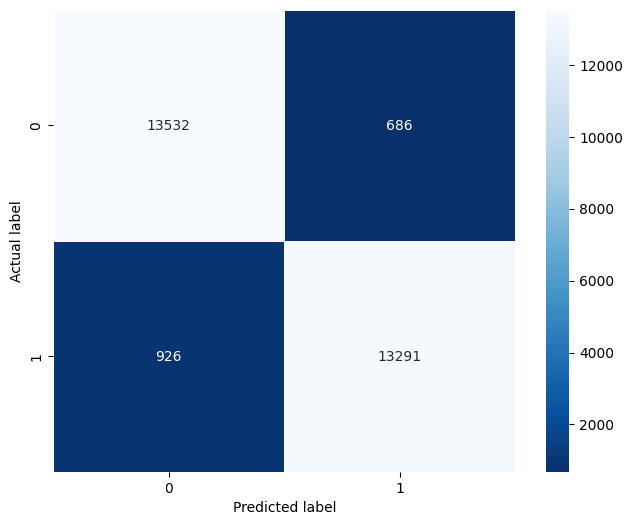

In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters for All Features: {best_params}")
print(f"Best cross-validation accuracy For All Features: {best_score:.2f}")

# Train the final classifier with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predict the response for the test dataset with the pruned tree
y_pred = best_clf.predict(X_test)

# Evaluate the accuracy of the classifier after pruning
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy of Decision Tree classifier: {accuracy:.2f}')

# Display a classification report to understand the classifier's performance
print("\nClassification Report For All Features:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Step 2: Perform Pruning to improve accuracy


Accuracy of Decision Tree classifier after pruning: 0.94

Classification Report after Pruning:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     14218
           1       0.93      0.94      0.94     14217

    accuracy                           0.94     28435
   macro avg       0.94      0.94      0.94     28435
weighted avg       0.94      0.94      0.94     28435



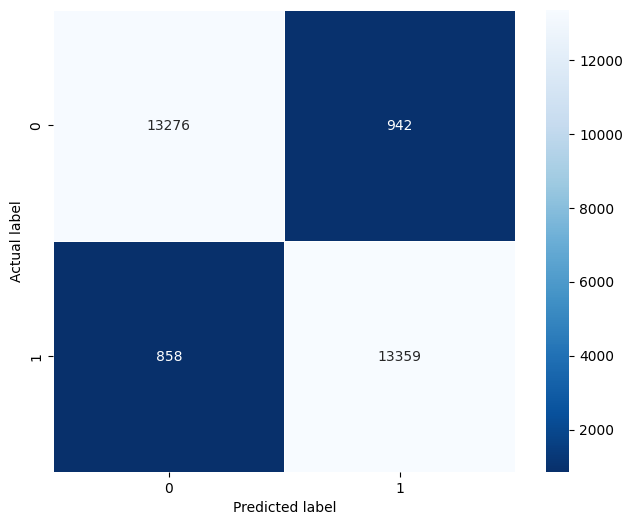

In [ ]:
# Obtain the effective alphas and the corresponding total leaf impurities
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Initialize variables to find the best alpha
best_alpha = 0
best_accuracy = 0

# Limit the number of ccp_alphas for performance reasons (for example, 10)
sampled_ccp_alphas = np.append([0], np.linspace(min(ccp_alphas), max(ccp_alphas), num=10))

# Iterate over a subset of ccp_alpha values to find the best one
for ccp_alpha in sampled_ccp_alphas:
    # Set the ccp_alpha parameter and train the classifier
    clf.set_params(ccp_alpha=ccp_alpha)

    # Perform cross-validation and compute the mean accuracy
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
    accuracy = scores.mean()

    # Check if this alpha gives us the best accuracy
    if accuracy > best_accuracy:
        best_alpha = ccp_alpha
        best_accuracy = accuracy

# Train the final classifier with the best alpha
clf.set_params(ccp_alpha=best_alpha)
clf.fit(X_train, y_train)

# Predict the response for the test dataset with the pruned tree
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier after pruning
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy of Decision Tree classifier after pruning: {accuracy:.2f}')

# Display a classification report to understand the classifier's performance after pruning
print("\nClassification Report after Pruning:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix after pruning
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# **RANDOM FOREST**

Step 1: Carry out Hyperparameter tuning and build the model with the best parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_distributions = {
    'n_estimators': randint(100, 1000),   # Number of trees in the forest
    'max_depth': randint(10, 100),        # Maximum number of levels in each decision tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 4),    # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at every split
}

# Setup RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_distributions, n_iter=10,
                                      cv=4, scoring='accuracy', n_jobs=-1,
                                      random_state=42, verbose=3)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Random Forest Parameters for All Features:", random_search_rf.best_params_)
print("Best Random Forest Cross-Validation Score for All Features:", random_search_rf.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/_n_jo

Best Random Forest Parameters for All Features: {'max_depth': 97, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 291}
Best Random Forest Cross-Validation Score for All Features: 0.9575695230421967


Step 2: Evaluate the results

Best model accuracy: 95.70%
Best model precision: 95.73%
Best model recall: 95.70%
Best model F1 score: 95.69%
Best model confusion matrix:
[[13807   411]
 [  813 13404]]


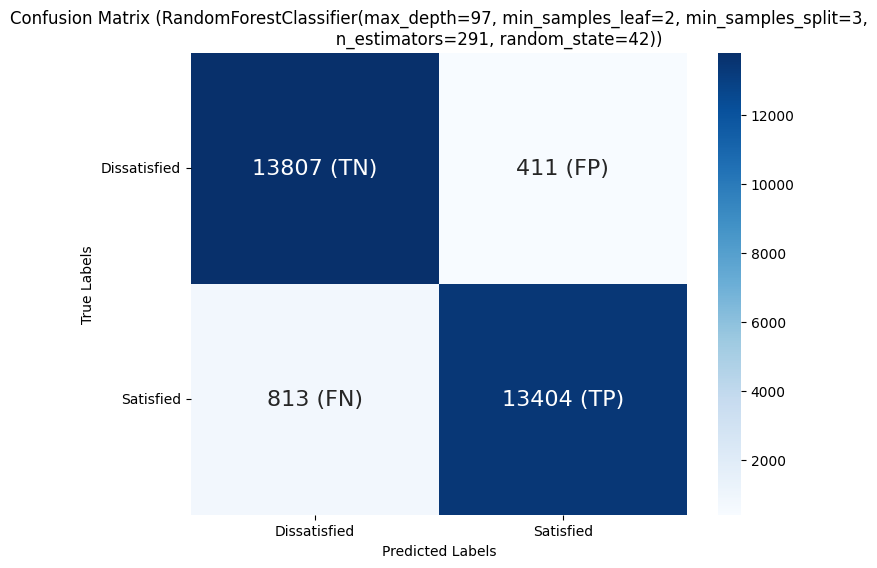

In [ ]:
# Evaluate the best model on the testing data
best_model = random_search_rf.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='weighted')
best_recall = recall_score(y_test, y_pred_best, average='weighted')
best_f1 = f1_score(y_test, y_pred_best, average='weighted')
best_conf_matrix = confusion_matrix(y_test, y_pred_best)

print(f'Best model accuracy: {best_accuracy * 100:.2f}%')
print(f'Best model precision: {best_precision * 100:.2f}%')
print(f'Best model recall: {best_recall * 100:.2f}%')
print(f'Best model F1 score: {best_f1 * 100:.2f}%')
print('Best model confusion matrix:')
print(best_conf_matrix)

#visualize the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

# Create the combined annotation matrix
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
annot = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f'{cm[i, j]} ({labels[i, j]})'

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', annot_kws={"size": 16})

# Customize plot
plt.title(f'Confusion Matrix ({best_model})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['Dissatisfied', 'Satisfied'])
plt.yticks(ticks=[0.5, 1.5], labels=['Dissatisfied', 'Satisfied'], rotation=0)
plt.show()

# **GRADIENT BOOSTING**

Step 1:

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split

# Define the model
hgb = HistGradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_distributions = {
    'learning_rate': uniform(0.01, 0.3),       # Learning rate: small values for smoother updates
    'max_iter': randint(100, 1000),             # Number of boosting iterations
    'max_leaf_nodes': randint(10, 100),        # Maximum leaf nodes per tree
    'max_depth': randint(3, 25),              # Maximum depth of the tree
    'min_samples_leaf': randint(5, 50),      # Minimum number of samples per leaf
    'max_bins': randint(128, 300),            # Number of bins for continuous features
}

# Setup RandomizedSearchCV
random_search_hgb = RandomizedSearchCV(hgb, param_distributions=param_distributions, n_iter=10,  # Number of random samples
                                       cv=4, scoring='accuracy', n_jobs=-1,
                                       random_state=42, verbose=3)

# Fit RandomizedSearchCV
random_search_hgb.fit(X_train, y_train)

# Best parameters and score
print("Best HistGradientBoosting Parameters:", random_search_hgb.best_params_)
print("Best HistGradientBoosting Cross-Validation Score:", random_search_hgb.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
4 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Best HistGradientBoosting Parameters: {'learning_rate': 0.12236203565420874, 'max_bins': 220, 'max_depth': 17, 'max_iter': 206, 'max_leaf_nodes': 81, 'min_samples_leaf': 25}
Best HistGradientBoosting Cross-Validation Score: 0.9595037775713844


Best model accuracy: 95.88%
Best model precision: 95.91%
Best model recall: 95.88%
Best model F1 score: 95.88%
Best model confusion matrix:
[[13811   407]
 [  765 13452]]


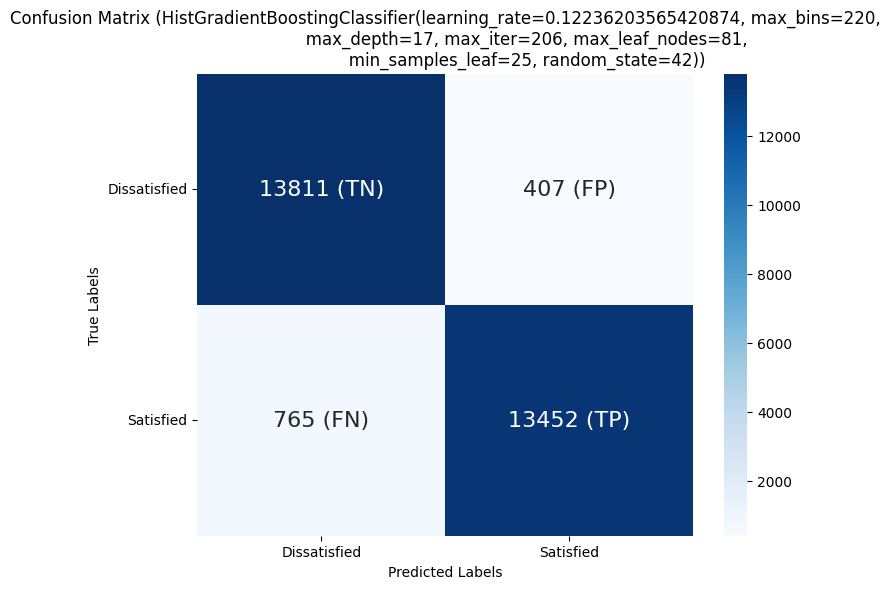

In [ ]:
# Evaluate the best model on the testing data
best_model = random_search_hgb.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='weighted')
best_recall = recall_score(y_test, y_pred_best, average='weighted')
best_f1 = f1_score(y_test, y_pred_best, average='weighted')
best_conf_matrix = confusion_matrix(y_test, y_pred_best)

print(f'Best model accuracy: {best_accuracy * 100:.2f}%')
print(f'Best model precision: {best_precision * 100:.2f}%')
print(f'Best model recall: {best_recall * 100:.2f}%')
print(f'Best model F1 score: {best_f1 * 100:.2f}%')
print('Best model confusion matrix:')
print(best_conf_matrix)

#visualize the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

# Create the combined annotation matrix
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
annot = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f'{cm[i, j]} ({labels[i, j]})'

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', annot_kws={"size": 16})

# Customize plot
plt.title(f'Confusion Matrix ({best_model})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['Dissatisfied', 'Satisfied'])
plt.yticks(ticks=[0.5, 1.5], labels=['Dissatisfied', 'Satisfied'], rotation=0)
plt.show()